In [181]:
import matplotlib.pyplot as plt
from scipy.special import expit
from pylab import *
from itertools import product
city =   0
drone =  1
rice = 2
couscous = 3
beer = 4
name_map = {city: 'city phone', drone: 'drone phone', rice: 'rice', couscous: 'couscous', beer: 'beer'}

# An embedding provided that gives similarities between products
Psi = array([[1.,0.5,0,0,0],[.1,1,0,0,0],[0,0,1,.1,0],[0,0,0.1,1,0],[0,.0,0,0,1]])
P, K = Psi.shape

Psi

array([[1. , 0.5, 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [182]:
matmul(Psi,Psi.T)

array([[1.25, 0.6 , 0.  , 0.  , 0.  ],
       [0.6 , 1.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.01, 0.2 , 0.  ],
       [0.  , 0.  , 0.2 , 1.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ]])

In [183]:
P = 5 # number of products


data = [{'a': city, 'h': [city], 'I': 10000, 'C': 100},
        {'a': drone, 'h': [city], 'I': 10000, 'C': 200},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 10000, 'C': 100},
        {'a': drone, 'h': [drone], 'I': 10000, 'C': 100},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 10000, 'C': 100},        
        {'a': couscous, 'h': [rice], 'I': 10000, 'C': 200},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 10000, 'C': 200},        
        {'a': couscous, 'h': [couscous], 'I': 10000, 'C': 100},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]


data_empty = [{'a': city, 'h': [city], 'I': 0, 'C': 0},
        {'a': drone, 'h': [city], 'I': 0, 'C': 0},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 0, 'C': 0},
        {'a': drone, 'h': [drone], 'I': 0, 'C': 0},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [rice], 'I': 0, 'C': 0},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 0, 'C': 0}]

In [184]:
data

[{'a': 0, 'h': [0], 'I': 10000, 'C': 100},
 {'a': 1, 'h': [0], 'I': 10000, 'C': 200},
 {'a': 2, 'h': [0], 'I': 0, 'C': 0},
 {'a': 3, 'h': [0], 'I': 0, 'C': 0},
 {'a': 4, 'h': [0], 'I': 0, 'C': 0},
 {'a': 0, 'h': [1], 'I': 10000, 'C': 100},
 {'a': 1, 'h': [1], 'I': 10000, 'C': 100},
 {'a': 2, 'h': [1], 'I': 0, 'C': 0},
 {'a': 3, 'h': [1], 'I': 0, 'C': 0},
 {'a': 4, 'h': [1], 'I': 0, 'C': 0},
 {'a': 0, 'h': [2], 'I': 0, 'C': 0},
 {'a': 1, 'h': [2], 'I': 0, 'C': 0},
 {'a': 2, 'h': [2], 'I': 10000, 'C': 100},
 {'a': 3, 'h': [2], 'I': 10000, 'C': 200},
 {'a': 4, 'h': [2], 'I': 0, 'C': 0},
 {'a': 0, 'h': [3], 'I': 0, 'C': 0},
 {'a': 1, 'h': [3], 'I': 0, 'C': 0},
 {'a': 2, 'h': [3], 'I': 10000, 'C': 200},
 {'a': 3, 'h': [3], 'I': 10000, 'C': 100},
 {'a': 4, 'h': [3], 'I': 0, 'C': 0},
 {'a': 0, 'h': [4], 'I': 0, 'C': 0},
 {'a': 1, 'h': [4], 'I': 0, 'C': 0},
 {'a': 2, 'h': [4], 'I': 0, 'C': 0},
 {'a': 3, 'h': [4], 'I': 0, 'C': 0},
 {'a': 4, 'h': [4], 'I': 1000, 'C': 20}]

In [185]:
def expand_data_binomial(d):
    a = d['a']
    omega = vstack([Psi[h,:] for h in d['h']]).mean(0)
    c = d['C']
    i = d['I']
    return omega, a, c, i

In [186]:
def do_plot(s):
    med = s['ctr'].mean(0).flatten()
    low = med - percentile(s['ctr'],2.5,axis=0).flatten()
    up = percentile(s['ctr'],97.5,axis=0).flatten() - med


    xnames = ['h=' + h+' a='+a for h,a in product(name_map.values(),name_map.values())]
    figure(figsize=(10,8))

    errorbar(xnames,y=med.flatten(),yerr=vstack((low,up)),fmt='.',ecolor='rrrrrgggggmmmmmccccckkkkk')
    _ = xticks(rotation=90)

    plot(xnames,(click)/(impres),'x')

    
def print_best_rec(s):
    best_rec = s['ctr'].mean(0).argmax(1)

    for ii in range(P):
        print('when hist is ' + list(name_map.values())[ii] + ' recommend ' + list(name_map.values())[best_rec[ii]])

In [187]:
import pystan


script = """
data {
  int P;
  int N;
  int K;
  int click[N];
  int impres[N];  
  int a[N];
  vector[K] omega[N];
  matrix[P,K] Psi;
  real w1;
  real w2;
}

parameters {
  matrix[K,K] eps;
  real offset;
  real rho[P];
} transformed parameters{
  matrix[P,K] beta;
  
  beta = w1 * Psi + w2 * Psi * eps;
}

model {
  rho ~ normal(0, 0.1);
  offset ~ normal(-5,3);
  for (k in 1:K) {
    eps[k] ~ normal(0, 1);
  }
  for (n in 1:N) {
    click[n] ~ binomial_logit(impres[n],  dot_product(omega[n], beta[a[n],:]) + offset + rho[a[n]]);
  }
} generated quantities {
  matrix[P,P] ctr;
  for (p in 1:P) {
     ctr = inv_logit(Psi * beta' + offset + rho[p]);
  }
}
"""

model = pystan.StanModel(model_code=script)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbb5417387331e8cb59899ded87ad1c1 NOW.


Let's try the model using only the organic embeddings and no bandit data

In [188]:
# fit to the empty data set
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data_empty])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': 1, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

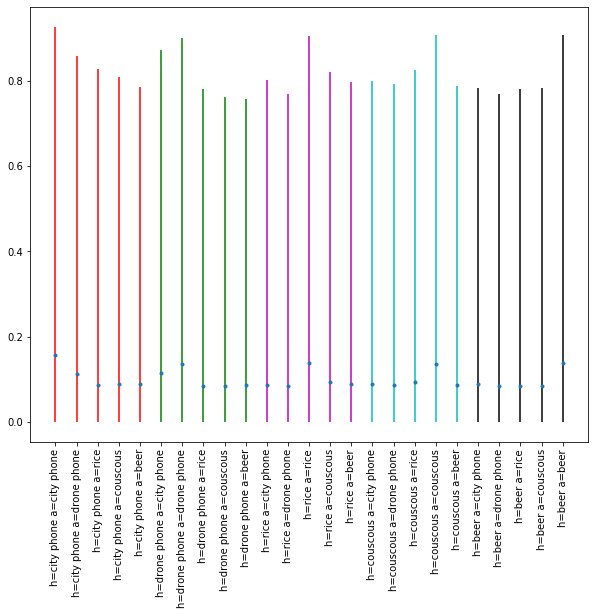

In [189]:
do_plot(s)

In [190]:
print_best_rec(s)

when hist is city phone recommend city phone
when hist is drone phone recommend drone phone
when hist is rice recommend rice
when hist is couscous recommend couscous
when hist is beer recommend beer


Now let's see if we get an advantage by using the bandit signal

In [191]:
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': 1, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

In [192]:
omega

array([[1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [193]:
Psi

array([[1. , 0.5, 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [194]:
action

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4])

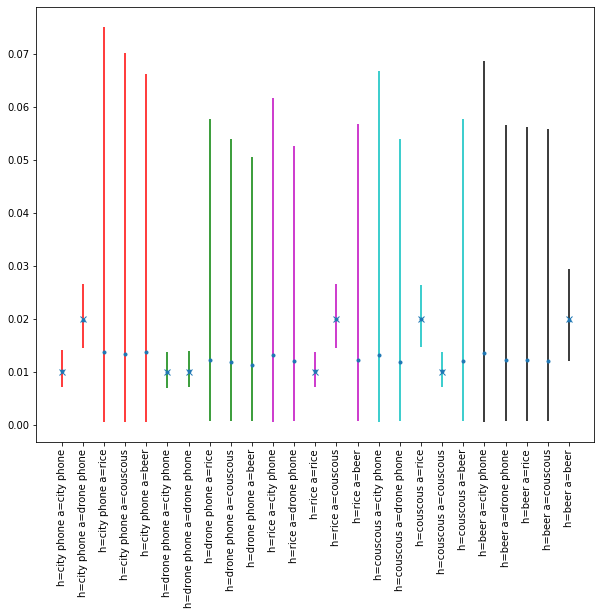

In [195]:
do_plot(s)

In [196]:
print_best_rec(s)

when hist is city phone recommend drone phone
when hist is drone phone recommend rice
when hist is rice recommend couscous
when hist is couscous recommend rice
when hist is beer recommend beer


In [197]:
s['beta'].mean(0)

array([[ 0.22636058,  0.35868214, -0.005691  , -0.02093835,  0.00120648],
       [ 0.92218336,  0.30732054,  0.01510015, -0.01920215,  0.00375453],
       [-0.01662125,  0.01020952,  0.28382146,  1.05130852, -0.00509827],
       [-0.00177126, -0.00733876,  1.05512932,  0.28722476, -0.01363376],
       [-0.00368412, -0.01611172,  0.00520506, -0.00909982,  1.06232994]])

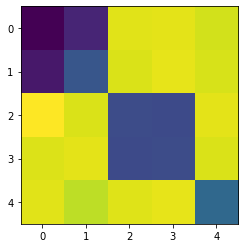

In [198]:
imshow(s['eps'].std(0))

In [199]:
s['eps'].mean(0)

array([[-1.24708537e+00,  2.15812495e-01, -1.39379735e-02,
        -1.19339725e-02, -7.06092868e-04],
       [ 9.46891899e-01, -7.14260707e-01,  1.64939491e-02,
        -1.80087573e-02,  3.82514419e-03],
       [-1.66102271e-02,  1.10539375e-02, -8.19890374e-01,
         1.03291520e+00, -3.77262227e-03],
       [-1.10235832e-04, -8.44415330e-03,  1.03711836e+00,
        -8.16066761e-01, -1.32565018e-02],
       [-3.68411927e-03, -1.61117153e-02,  5.20505923e-03,
        -9.09982269e-03,  6.23299432e-02]])

In [200]:
percentile(s['ctr'],50,axis=0).flatten()



array([0.01017432, 0.01967717, 0.00669223, 0.00684807, 0.00671649,
       0.00993091, 0.01011405, 0.00687376, 0.0066895 , 0.00667307,
       0.00687882, 0.00697876, 0.01000965, 0.01984087, 0.00695676,
       0.00668756, 0.00666881, 0.01978743, 0.010031  , 0.00677289,
       0.00682729, 0.00677245, 0.0067689 , 0.00673064, 0.01961727])

In [201]:
s['ctr'].mean(0)

array([[0.01031276, 0.01992111, 0.01374579, 0.01352327, 0.01375177],
       [0.01007257, 0.01025746, 0.01237367, 0.01195857, 0.01140002],
       [0.01332961, 0.01220345, 0.01014342, 0.02006562, 0.01227763],
       [0.0132519 , 0.01188027, 0.01997943, 0.01018626, 0.0121251 ],
       [0.01355164, 0.01222474, 0.01229124, 0.01206531, 0.01991147]])